#### Importing Various Python Libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#### Import Companies Data using unicode_escape encoding

In [2]:
companies = pd.read_csv('companies.csv', encoding='unicode_escape')
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [3]:
# analysing null values
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [4]:
# analysing companies info we find that the possible candidates of unique key are parmalink and name.
# but permalink has no null values and name has one null value plus some records which show '#NAME?'
companies.name.value_counts()

#NAME?                                           4
Peach                                            4
Spire                                            4
Roost                                            4
Karma                                            4
                                                ..
Game Time Tickets                                1
Game Trading technologies, Inc.                  1
Game Trust                                       1
Game Ventures                                    1
Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic    1
Name: name, Length: 66099, dtype: int64

In [5]:
# on the other hand, permalink has all unique values
# hence we will stick with permalink as unique key
companies.permalink.value_counts()

/Organization/-Fame                                            1
/Organization/Pmedianetwork                                    1
/Organization/Pluristem-Therapeutics                           1
/Organization/Plurogen-Therapeutics                            1
/Organization/Pluromed                                         1
                                                              ..
/Organization/Galxyz                                           1
/Organization/Gamaby                                           1
/Organization/Gamador                                          1
/Organization/Gamaliel                                         1
/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-Hizmetleri-Tic    1
Name: permalink, Length: 66368, dtype: int64

#### Importing Rounds2 CSV file.

In [6]:
rounds2 = pd.read_csv('rounds2.csv', encoding='unicode_escape')
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [7]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [8]:
rounds2.company_permalink.value_counts()

/ORGANIZATION/SOLARFLARE                                       10
/ORGANIZATION/EXAGEN-DIAGNOSTICS                                9
/organization/quellan                                           9
/organization/semprius                                          9
/ORGANIZATION/SEMPRIUS                                          9
                                                               ..
/organization/gumhouse                                          1
/organization/gumbuya                                           1
/ORGANIZATION/GUMBUYA                                           1
/organization/gumball                                           1
/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic     1
Name: company_permalink, Length: 90247, dtype: int64

## Checkpoint 1: Data Cleaning 1
Rounds2 company_permalink has duplicate values as well as lower and upper case values
To count the unique values and merge them with Companies Data we will do this:

a. change the values permalink and company_permalink in companies and rounds2 data respectively

b. to merge companies data with rounds 2 data we will rename the column 'company_permalink' in rounds2 to 'permalink'

c. after renaming we will merge the datasets by setting 'permalink' in companies as Index.

In [9]:
rounds2.company_permalink  = rounds2.company_permalink.str.lower()

# Table-1.1

#### Q1: How many unique companies are present in rounds2?

In [10]:
rounds2.company_permalink.nunique()

66370

#### Q2: How many unique companies are present in companies?

In [11]:
companies.permalink.nunique()

66368

In [12]:
companies.permalink  = companies.permalink.str.lower()

#### Q4: Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

In [13]:
len(set(rounds2.company_permalink) - set(companies.permalink))

7

In [14]:
rounds2.rename(columns={'company_permalink':'permalink'}, inplace=True)

In [15]:
master_frame = rounds2.merge(companies.set_index('permalink'), on='permalink', how='outer')
master_frame.head(10)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


#### Q5: Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [16]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114954 entries, 0 to 114953
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114954 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   name                     114946 non-null  object 
 7   homepage_url             108813 non-null  object 
 8   category_list            111538 non-null  object 
 9   status                   114947 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
 12  region                   104782 non-null  object 
 13  city                     104785 non-null  object 
 14  foun

We have now Master data in master_frame after merging companies and rounds2 data on permalink.

As the scope of the project does not utilises columns like: 'funding_round_permalink', 'funding_round_code', 'funded_at', 'homepage_url', 'status', 'state_code', 'region', 'city', 'founded_at'

We will drop these columns.

In [17]:
master_frame = master_frame.drop(columns=['funding_round_permalink','funding_round_code','funded_at','homepage_url','status','state_code','region','city','founded_at'], axis=1)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114954 entries, 0 to 114953
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   permalink           114954 non-null  object 
 1   funding_round_type  114949 non-null  object 
 2   raised_amount_usd   94959 non-null   float64
 3   name                114946 non-null  object 
 4   category_list       111538 non-null  object 
 5   country_code        106271 non-null  object 
dtypes: float64(1), object(5)
memory usage: 6.1+ MB


In [18]:
#analysing null values in the master data frame.
master_frame.isnull().sum()

permalink                 0
funding_round_type        5
raised_amount_usd     19995
name                      8
category_list          3416
country_code           8683
dtype: int64

We are left with some null values across 'category_list', 'country_code', 'funding_round_type'
This data is categorical data and imputing the nulls with medians may get completely different results. 
So we should drop those rows where the values are not available.

We are ignoring name column as we have permalink for the company which can also be used for the company identifier

In [19]:
# dropping rows where 'category_list' is not available.
master_frame = master_frame[~master_frame.category_list.isnull()]

In [20]:
# dropping rows where 'country_code' is not available.
master_frame = master_frame[~master_frame.country_code.isnull()]

In [21]:
# dropping rows where 'funding_round_type' is not available.
master_frame = master_frame[~master_frame.funding_round_type.isnull()]

In [22]:
# In this project we are only concerned with data where 'funding_round_type' i.e FT falls only in 'venture', 'seed', 'angel', 'private_equity' categories
# Hence we will filter and get those rows only
master_frame = master_frame[(master_frame.funding_round_type == 'venture')|(master_frame.funding_round_type == 'seed')|(master_frame.funding_round_type == 'angel')|(master_frame.funding_round_type == 'private_equity')]

In [23]:
master_frame.isnull().sum()

permalink                 0
funding_round_type        0
raised_amount_usd     10810
name                      1
category_list             0
country_code              0
dtype: int64

#### Imputing 'raised_amount_usd' by using medians of respective FT

In [24]:
# 'raised_amount_usd' is still null on significant number of rows. Dropping these number of rows may skew our analysis.
# We should now imputer these null values by filling up the medians of their respective categories
master_frame['raised_amount_usd'] = master_frame.groupby('funding_round_type')['raised_amount_usd'].apply(lambda x:x.fillna(x.median()))

/var/folders/yl/g6d3ryz55tsb03rm6dhltbvm0000gn/T/ipykernel_3424/674098845.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  master_frame['raised_amount_usd'] = master_frame.groupby('funding_round_type')['raised_amount_usd'].apply(lambda x:x.fillna(x.median()))


In [25]:
master_frame.isnull().sum()

permalink             0
funding_round_type    0
raised_amount_usd     0
name                  1
category_list         0
country_code          0
dtype: int64

# Table-2.1

In [26]:
pit = master_frame.groupby('funding_round_type').median().sort_values('raised_amount_usd', ascending=False)
pit.head()

/var/folders/yl/g6d3ryz55tsb03rm6dhltbvm0000gn/T/ipykernel_3424/400312366.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pit = master_frame.groupby('funding_round_type').median().sort_values('raised_amount_usd', ascending=False)


,raised_amount_usd
funding_round_type,
private_equity,20000000.0
venture,5000000.0
angel,414906.0
seed,300000.0


#### Q1: Representative funding amount of venture type

In [27]:
venture = pit['raised_amount_usd'].loc['venture']
print(venture)

5000000.0


#### Q2: Representative funding amount of angel type

In [28]:
angel = pit['raised_amount_usd'].loc['angel']
print(angel)

414906.0


#### Q3: Representative funding amount of seed type

In [29]:
seed = pit['raised_amount_usd'].loc['seed']
print(seed)

300000.0


#### Q4: Representative funding amount of private equity type

In [30]:
p_equity = pit['raised_amount_usd'].loc['private_equity']
print(p_equity)

20000000.0


#### Q5: Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [31]:
suitable = pit[(pit.raised_amount_usd >= 5000000) & (pit.raised_amount_usd <= 15000000)].iloc[0].name
print(suitable)

venture


# Checkpoint 3: Country Analysis

Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [32]:
# we will group the master frame by country_code and then take a sum to get total invsetments accross FTs.
# we will sort this data in descending on 'raised_amount_usd' and take top 9 values by head(9)
top9 = master_frame.groupby('country_code').sum().sort_values('raised_amount_usd', ascending=False).head(9)

print(top9)

              raised_amount_usd
country_code                   
USA                5.225766e+11
CHN                6.360875e+10
GBR                2.864659e+10
IND                2.207420e+10
CAN                1.376262e+10
DEU                9.932234e+09
ISR                8.750532e+09
FRA                8.520397e+09
NLD                5.475007e+09


/var/folders/yl/g6d3ryz55tsb03rm6dhltbvm0000gn/T/ipykernel_3424/1371887901.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top9 = master_frame.groupby('country_code').sum().sort_values('raised_amount_usd', ascending=False).head(9)


# Table - 3.1

#### From the above list we find that CHN doesn't have English as official Language.
### IND has English as Co-Official Minor language but the scope of this project clearly says to take only Official countries. So we take CAN as the next country.

In [33]:
C1 = 'USA' #Table -  3.1 Q1: Top English speaking country
C2 = 'GBR' #Table -  3.1 Q2: Second English speaking country
C3 = 'CAN' #Table -  3.1 Q3: Third English speaking country

# Checkpoint 4: Sector Analysis 1

In [34]:
# Adding Primay Sector to master frame after spliting category_list value on '|' and taking the first value as Primary Sector.
master_frame['Primary_Sector'] = master_frame['category_list'].apply(lambda x : x.split('|')[0])
master_frame.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Primary_Sector
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,Media
1,/organization/-qounter,venture,5000000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA,Application Platforms
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN,Curated Web
5,/organization/004-technologies,venture,5000000.0,004 Technologies,Software,USA,Software


In [35]:
mapping = pd.read_csv('mapping.csv', encoding='unicode_escape')
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


Removing the one odd null value

In [36]:
mapping.category_list.isnull().sum()

1

In [37]:
mapping = mapping[~mapping.category_list.isnull()]

Melting the dataframe 'mapping' to 'long_format'

In [38]:
id_vars = ['category_list']
value_vars = list(np.setdiff1d(mapping.columns, id_vars))

print(id_vars ,'\n')
print(value_vars)

['category_list'] 

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']


In [39]:
mapping = pd.melt(mapping, id_vars=id_vars, value_vars=value_vars)

In [40]:
mapping = mapping[mapping.value == 1]
mapping = mapping.drop(columns='value')
mapping.head(2)

,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports


In [41]:
# For analysing the master_frame on Main_Sector we will merge the mapping dataframe, which we already converted to long_fromat
# We will rename columns 'variable' and 'category_list' to 'Main_Sector' and 'Primary_Sector' respectively

In [42]:
mapping.rename(columns={'variable':'Main_Sector', 'category_list' : 'Primary_Sector'}, inplace=True)
mapping.head(2)

,Primary_Sector,Main_Sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports


In [43]:
# After we have changed the columns, we will merge master_frame with mapping on 'Primary_Sector' after setting 'Primary_Sector'
# as index in mapping dataframe.
# This will keep all the columns of master_frame.

In [44]:
master_frame = master_frame.merge(mapping.set_index('Primary_Sector'), on='Primary_Sector', how='outer')

In [45]:
# checking merged database and seeing that two columns Main_Sector and Primary_Sector appear.
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85992 entries, 0 to 85991
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           85934 non-null  object 
 1   funding_round_type  85934 non-null  object 
 2   raised_amount_usd   85934 non-null  float64
 3   name                85933 non-null  object 
 4   category_list       85934 non-null  object 
 5   country_code        85934 non-null  object 
 6   Primary_Sector      85992 non-null  object 
 7   Main_Sector         79548 non-null  object 
dtypes: float64(1), object(7)
memory usage: 5.9+ MB


In [46]:
master_frame.isnull().sum()

permalink               58
funding_round_type      58
raised_amount_usd       58
name                    59
category_list           58
country_code            58
Primary_Sector           0
Main_Sector           6444
dtype: int64

In [47]:
# We will again remove the rows which do not have permalink or for which Main_Sector is missing.
master_frame = master_frame[~master_frame.permalink.isnull()]
master_frame = master_frame[~master_frame.Main_Sector.isnull()]
master_frame.isnull().sum()

permalink             0
funding_round_type    0
raised_amount_usd     0
name                  1
category_list         0
country_code          0
Primary_Sector        0
Main_Sector           0
dtype: int64

# Checkpoint 5: Sector Analysis 2

We will create D1, D2, D3 for countries C1, C2, C3 respectively and take only those values which fall in suitable range i.e 5 million to 15 million.

## Table - 5.1

### First Country

In [48]:
D1 = master_frame[(master_frame.country_code == C1) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]
D1.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Primary_Sector,Main_Sector
6,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,USA,Media,Entertainment
25,/organization/chefs-feed,venture,5000000.0,ChefsFeed,Media|Mobile|Restaurants|Technology,USA,Media,Entertainment
48,/organization/huffingtonpost,venture,5000000.0,The Huffington Post,Media|News|Publishing,USA,Media,Entertainment
49,/organization/huffingtonpost,venture,5000000.0,The Huffington Post,Media|News|Publishing,USA,Media,Entertainment
70,/organization/matchmine,venture,10000000.0,MatchMine,Media|News|Reviews and Recommendations,USA,Media,Entertainment


#### Total number of Investments (count) in C1

In [49]:
len(D1)

13472

#### Total amount of investment (USD) in C1

In [50]:
D1.raised_amount_usd.sum()

112709038689.0

#### Top Three Sector names (no. of investment-wise) & total number of investments in C1

In [51]:
D1.Main_Sector.value_counts().head(3)

Others                                     3464
Cleantech / Semiconductors                 2672
Social, Finance, Analytics, Advertising    2376
Name: Main_Sector, dtype: int64

#### For point 3 (top sector count-wise), which company received the highest investment? in C1

In [52]:
D1[D1.Main_Sector == 'Others'].sort_values('raised_amount_usd', ascending = False).head(1)['name'].iloc[0]

'Equallogic'

#### For point 4 (second best sector count-wise), which company received the highest investment? in C1

In [53]:
D1[D1.Main_Sector == 'Cleantech / Semiconductors'].sort_values('raised_amount_usd', ascending = False).head(1)['name'].iloc[0]

'Sunverge Energy, Inc'

### Second Country

In [54]:
D2 = master_frame[(master_frame.country_code == C2) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]
D2.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Primary_Sector,Main_Sector
1,/organization/90min,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
2,/organization/90min,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
203,/organization/common-interest-communities,venture,10000000.0,Common Interest Communities,Application Platforms|Internet|Software|Startups,GBR,Application Platforms,"News, Search and Messaging"
238,/organization/geospock-ltd-,venture,5460000.0,GeoSpock Ltd.,Application Platforms|Databases|Real Time,GBR,Application Platforms,"News, Search and Messaging"
239,/organization/geospock-ltd-,venture,5400000.0,GeoSpock Ltd.,Application Platforms|Databases|Real Time,GBR,Application Platforms,"News, Search and Messaging"


#### Total number of Investments (count) in C2

In [55]:
len(D2)

811

#### Total amount of investment (USD) in C2

In [56]:
D2.raised_amount_usd.sum()

6295401698.0

#### Top Three Sector names (no. of investment-wise) & total number of investments in C2

In [57]:
D2.Main_Sector.value_counts().head(3)

Others                                     213
Cleantech / Semiconductors                 153
Social, Finance, Analytics, Advertising    144
Name: Main_Sector, dtype: int64

#### For point 3 (top sector count-wise), which company received the highest investment? in C2

In [58]:
D2[D2.Main_Sector == 'Others'].sort_values('raised_amount_usd', ascending = False).head(1)['name'].iloc[0]

'SenSage'

#### For point 4 (second best sector count-wise), which company received the highest investment? in C2

In [59]:
D2[D2.Main_Sector == 'Cleantech / Semiconductors'].sort_values('raised_amount_usd', ascending = False).head(1)['name'].iloc[0]

'Anadigm'

### Third Country

In [60]:
D3 = master_frame[(master_frame.country_code == C3) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]
D3.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,Primary_Sector,Main_Sector
428,/organization/abebooks,venture,5000000.0,AbeBooks,Curated Web|Textbooks,CAN,Curated Web,"News, Search and Messaging"
615,/organization/bitstrips,venture,8000000.0,Bitstrips,Curated Web|Digital Media|Entertainment|Messaging,CAN,Curated Web,"News, Search and Messaging"
757,/organization/casero,venture,7500000.0,Casero,Curated Web|Internet,CAN,Curated Web,"News, Search and Messaging"
758,/organization/casero,venture,5800000.0,Casero,Curated Web|Internet,CAN,Curated Web,"News, Search and Messaging"
824,/organization/clio,venture,6000000.0,Clio,Curated Web|Legal,CAN,Curated Web,"News, Search and Messaging"


#### Total number of Investments (count) in C3

In [61]:
len(D3)

496

#### Total amount of investment (USD) in C3

In [62]:
D3.raised_amount_usd.sum()

3955884941.0

#### Top Three Sector names (no. of investment-wise) & total number of investments in C3

In [63]:
D3.Main_Sector.value_counts().head(3)

Cleantech / Semiconductors                 139
Others                                     123
Social, Finance, Analytics, Advertising     67
Name: Main_Sector, dtype: int64

#### For point 3 (top sector count-wise), which company received the highest investment? in C3

In [64]:
D3[D3.Main_Sector == 'Cleantech / Semiconductors'].sort_values('raised_amount_usd', ascending = False).head(1)['name'].iloc[0]

'Zymeworks'

#### For point 4 (second best sector count-wise), which company received the highest investment? in C3

In [65]:
D3[D3.Main_Sector == 'Others'].sort_values('raised_amount_usd', ascending = False).head(1)['name'].iloc[0]

'Redline Communications'

# Checkpoint 6: Plots

In [66]:
# increasing the plot size to 16 by 9
plt.rcParams["figure.figsize"] = [16,9]

### A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

#### We have already found out this variable and have stored it on line # 26 as 'pit'

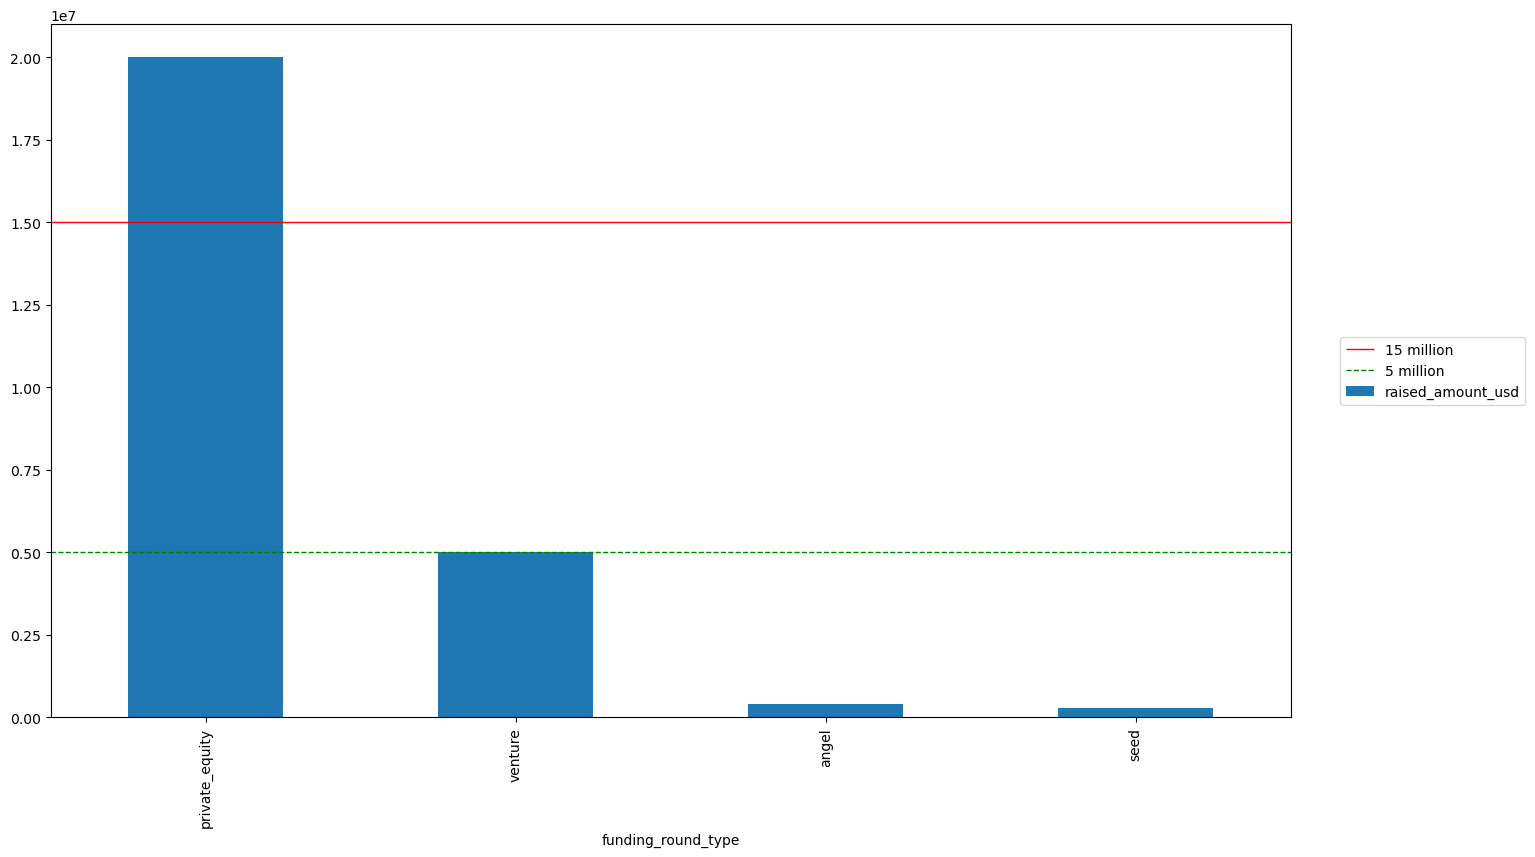

In [67]:
pit.plot.bar()

#adding vertical lines of 15 million and 5 million to show lower and upper thresholds
plt.hlines(y=15000000, xmin=-1, xmax=5, colors='red', linestyles='-', lw=1, label='15 million')
plt.hlines(y=5000000, xmin=-1, xmax=5, colors='green', linestyles='--', lw=1, label='5 million')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

In [68]:
plt.close()

### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

#### We have already found this dataframe and have stored it in 'top9' on line #32

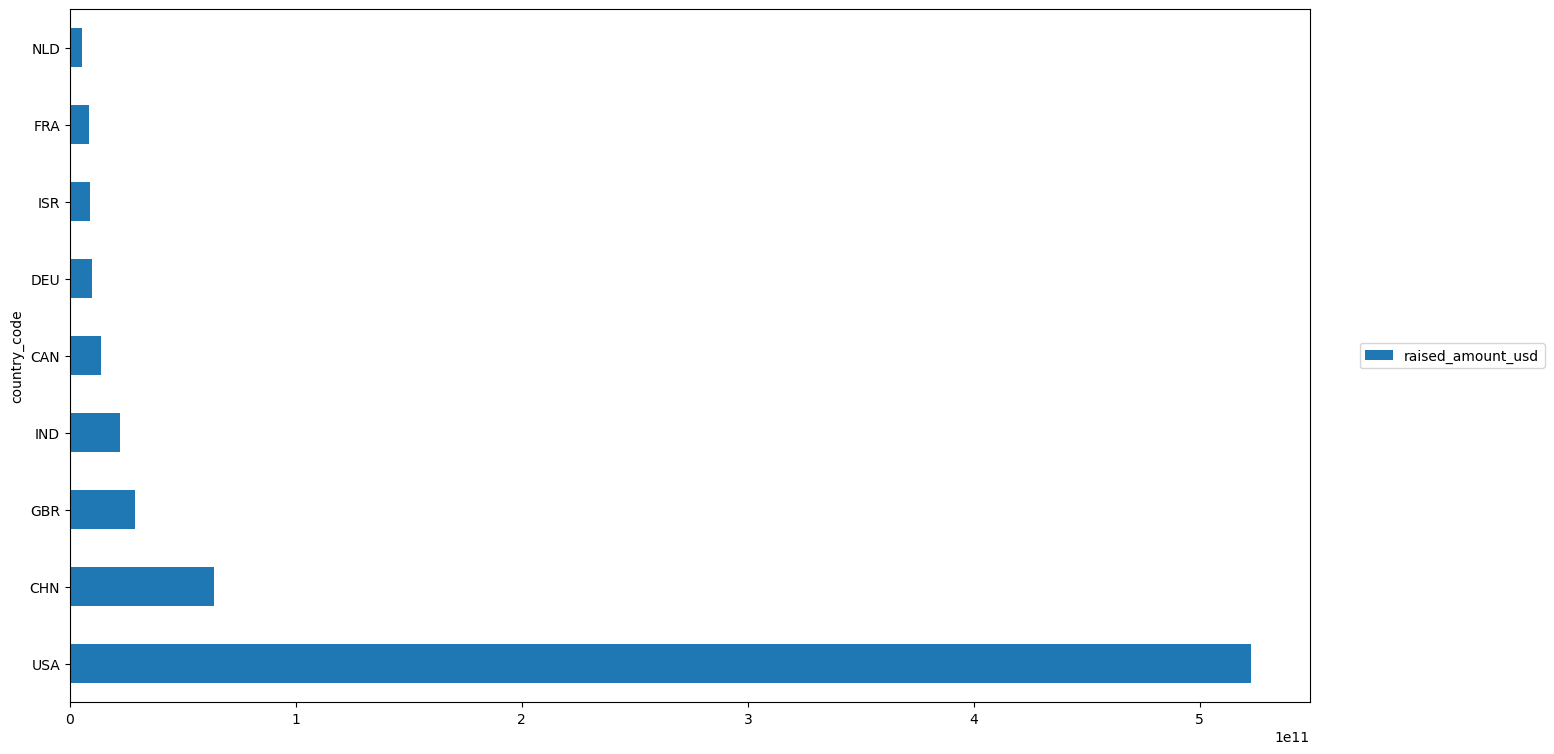

In [69]:
# We will plot a horizontal bar chart so that values can be seen dicreasing more easily. 
top9.plot.barh()

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.show()

In [70]:
plt.close()

### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

#### We will assume the FT as 'venture' and do the following:

1. Group the D1, D2, D3 on 'country_code' and 'Main_Sector'
2. Take a count on groupby to get number of occurrences of each sector.
3. Sort the values in descending order and take top 3 values.
4. Drop columns ''funding_round_type','raised_amount_usd','name','category_list','Primary_Sector' as they aren't required.
5. change 'permalink' to 'number_of_investments'
6. Merge the new dataframes df_c1, df_c2, df_c3 to make new df_merged
7. unstack the merged dataframe
8. plot the dataframe

In [71]:
chosen_ft = 'venture'

In [72]:
# Country 1
df_c1 = D1[D1.funding_round_type == chosen_ft].groupby(['country_code','Main_Sector']).count()
df_c1 = df_c1.sort_values('permalink', ascending=False).head(3)
df_c1 = df_c1.drop(columns=['funding_round_type','raised_amount_usd','name','category_list','Primary_Sector'])
df_c1.rename(columns={'permalink':'number_of_investments'}, inplace=True)
df_c1

number_of_investments
country_code Main_Sector                                                   
USA          Others                                                    3373
             Cleantech / Semiconductors                                2561
             Social, Finance, Analytics, Advertising                   2309

In [73]:
# Country 2
df_c2 = D2[D2.funding_round_type == chosen_ft].groupby(['country_code','Main_Sector']).count()
df_c2 = df_c2.sort_values('permalink', ascending=False).head(3)
df_c2 = df_c2.drop(columns=['funding_round_type','raised_amount_usd','name','category_list','Primary_Sector'])
df_c2.rename(columns={'permalink':'number_of_investments'}, inplace=True)
df_c2

number_of_investments
country_code Main_Sector                                                   
GBR          Others                                                     207
             Cleantech / Semiconductors                                 150
             Social, Finance, Analytics, Advertising                    139

In [74]:
# Country 3
df_c3 = D3[D3.funding_round_type == chosen_ft].groupby(['country_code','Main_Sector']).count()
df_c3 = df_c3.sort_values('permalink', ascending=False).head(3)
df_c3 = df_c3.drop(columns=['funding_round_type','raised_amount_usd','name','category_list','Primary_Sector'])
df_c3.rename(columns={'permalink':'number_of_investments'}, inplace=True)
df_c3

number_of_investments
country_code Main_Sector                                                   
CAN          Cleantech / Semiconductors                                 129
             Others                                                     120
             Social, Finance, Analytics, Advertising                     63

In [75]:
df_merged = df_c1.append(df_c2).append(df_c3)
df_merged

/var/folders/yl/g6d3ryz55tsb03rm6dhltbvm0000gn/T/ipykernel_3424/751381863.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = df_c1.append(df_c2).append(df_c3)
/var/folders/yl/g6d3ryz55tsb03rm6dhltbvm0000gn/T/ipykernel_3424/751381863.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = df_c1.append(df_c2).append(df_c3)


number_of_investments
country_code Main_Sector                                                   
USA          Others                                                    3373
             Cleantech / Semiconductors                                2561
             Social, Finance, Analytics, Advertising                   2309
GBR          Others                                                     207
             Cleantech / Semiconductors                                 150
             Social, Finance, Analytics, Advertising                    139
CAN          Cleantech / Semiconductors                                 129
             Others                                                     120
             Social, Finance, Analytics, Advertising                     63

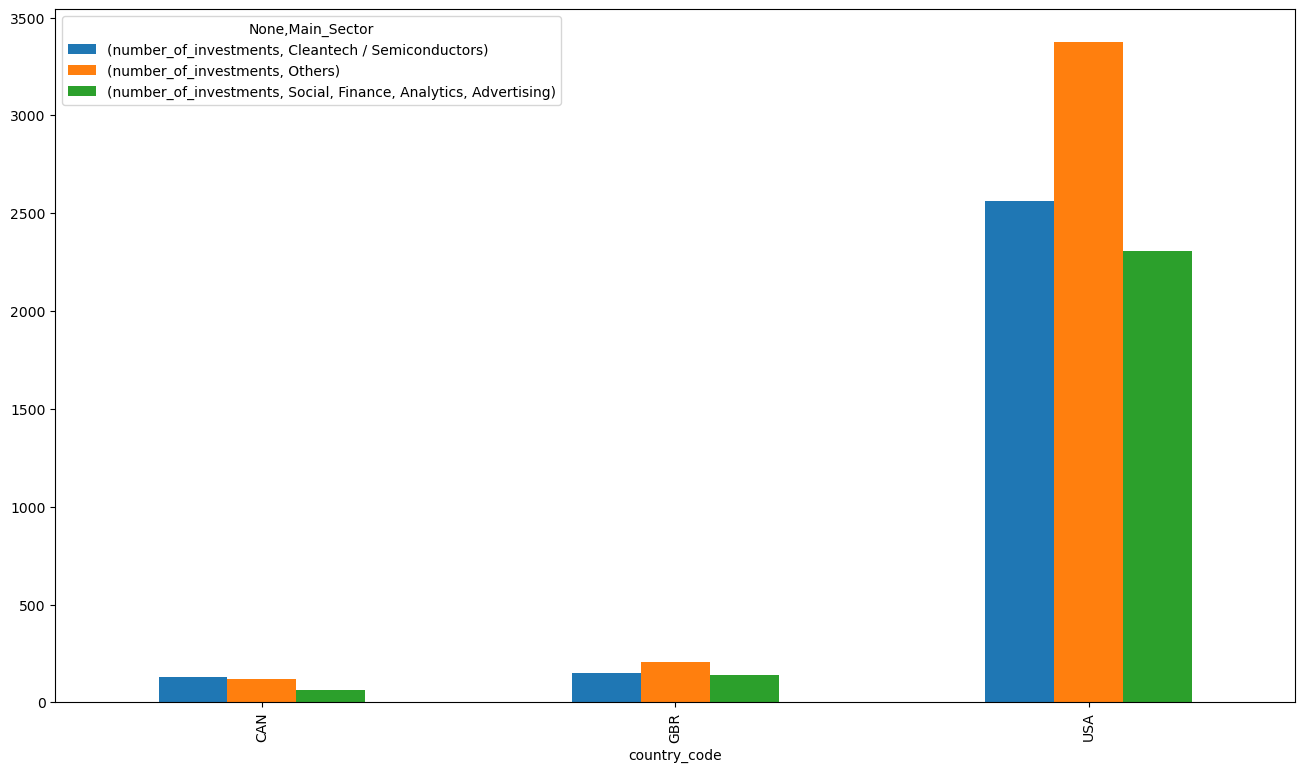

In [76]:
df_merged.unstack(level=-1).plot.bar()
plt.show()

In [77]:
plt.close()